In [82]:
from hands import process
import os
import imageio.v3 as imageio
from matplotlib import pyplot as plt
import numpy as np
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.src.models import Sequential
from keras.src.layers import Dense, Dropout,Input

In [72]:
asl_dict = {char: [] for char in string.digits + string.ascii_lowercase}
asl_dir = "asl_dataset"

sub_dirs = sorted([d for d in os.listdir(asl_dir) if os.path.isdir(os.path.join(asl_dir, d))])

for dir in sub_dirs:
    cur = os.path.join(asl_dir,dir)
    for img in os.listdir(cur):
        image_path = os.path.join(cur, img)
        im = imageio.imread(image_path)
        frame, landmarks = process(im, False, 1)
        try:
            asl_dict[dir].append(landmarks)
        except Exception as e:
            print(f'{e}: error adding to dict')

I0000 00:00:1730914553.707681 8729711 gl_context.cc:357] GL version: 2.1 (2.1 ATI-5.5.17), renderer: AMD Radeon Pro 5300M OpenGL Engine
W0000 00:00:1730914553.738479 9737574 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730914553.757468 9737574 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/jagan-kalsi/Desktop/class/csc/csc487/asl/myenv/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
I0000 00:00:1730914553.797857 8729711 gl_context.cc:357] GL version: 2.1 (2.1 ATI-5.5.17), renderer: AMD Radeon Pro 5300M OpenGL Engine
W0000 0

In [73]:
X = []
y = []

for label, landmarks_list in asl_dict.items():
    for landmarks in landmarks_list:
        if landmarks is not None and len(landmarks) == 63:  
            X.append(landmarks)
            y.append(label)

X = np.array(X, dtype=np.float32)  
y = np.array(y)  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [80]:
model = Sequential([
    Input(shape=(63,)),
    Dense(256, activation='relu'),
    Dropout(0.2), 
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),  
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/Users/jagan-kalsi/Desktop/class/csc/csc487/asl/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
history = model.fit(X_train, y_train, epochs=150, batch_size=8, validation_data=(X_test, y_test))
print(model.evaluate(X_test, y_test))

Epoch 1/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0391 - loss: 3.5647 - val_accuracy: 0.0859 - val_loss: 3.4557
Epoch 2/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0532 - loss: 3.3933 - val_accuracy: 0.0767 - val_loss: 2.9065
Epoch 3/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1263 - loss: 2.8586 - val_accuracy: 0.2117 - val_loss: 2.3118
Epoch 4/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1884 - loss: 2.3954 - val_accuracy: 0.2607 - val_loss: 2.1419
Epoch 5/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2808 - loss: 2.0488 - val_accuracy: 0.3282 - val_loss: 1.8224
Epoch 6/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3185 - loss: 1.9128 - val_accuracy: 0.4939 - val_loss: 1.4168
Epoch 7/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3563 - loss: 1.6940 - val_accuracy: 0.5583 - val_loss: 1.2543
Epoch 8/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4173 - loss: 1.5367 - val_accu

AttributeError: 'NoneType' object has no attribute 'shape'

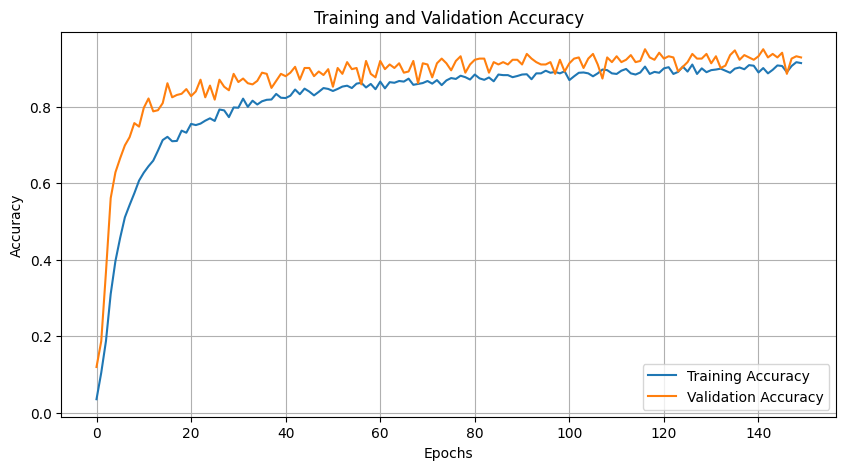

In [76]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# MP does not always give a great reading on hands in still images
# Model is pretty inaccurate
model.save('asl-model.keras')